In [1]:
import pathlib
import numpy as np
from fytok.Tokamak import Tokamak
from spdm.view import View as sp_view

input_path = pathlib.Path("/home/salmon/workspace/fytok_data/data/15MA inductive - burn")


2023-11-07 16:20:15,292 [   fytok]     INFO: 
#######################################################################################################################
    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/

 Copyright (c) 2021-present Zhi YU (Institute of Plasma Physics Chinese Academy of Sciences)
            
 url: https://gitee.com/openfusion/fytok_tutorial 
      https://github.com/fusion-yun/fytok_tutorial

 version = 0.2.2.dev45+g2d18fac.d20231106 ( extension=0.2.2.dev11+g706f667, imas_version=v3_38_1_dirty ) 

 Run by salmon on Surface at 2023-11-07T16:20:15.292144

#######################################################################################################################



In [2]:
tokamak = Tokamak(f"file+iterprofiles://{next(input_path.glob('*ASTRA.xls')).absolute().as_posix()}",
                  f"file+geqdsk://{next(input_path.glob('**/g*.txt')).absolute().as_posix()}",
                  device="iter",
                  shot=900003,
                  time=2.30,
                  transport_solver={"code":  {"name": "fytrans",
                                              "parameters": {
                                                  "rho_tor_norm": np.linspace(0.01, 0.995, 128),
                                                  "bvp_rms_mask": [0.96],
                                                  "hyper_diff": 0.0001
                                              }}})


2023-11-07 16:20:15,363 [   fytok]     INFO: Load module spdm.plugins.data.plugin_xml
2023-11-07 16:20:15,528 [   fytok]     INFO: Load module spdm.plugins.data.plugin_iterprofiles
2023-11-07 16:20:15,615 [   fytok]     INFO: Load module spdm.plugins.data.plugin_geqdsk
2023-11-07 16:20:15,639 [   fytok]     INFO: Load module fytok.plugins.transport_solver_numerics.fytrans
2023-11-07 16:20:15,995 [   fytok]     INFO: Load module fytok.plugins.equilibrium.eq_analyze
2023-11-07 16:20:15,998 [   fytok]     INFO: Tokamak simulation : 
-----------------------------------------------------------------------------------------------------------------------
                                                Brief Summary
-----------------------------------------------------------------------------------------------------------------------
Dataset Description:
 
    Device: ITER, Shot: 900003, Run: 0, 
    Run by Salmon on Surface at 2023-11-07T16:20:15.638135, base on ontology "imas/3 modified"

--

2023-11-07 16:20:16,019 [   fytok]     INFO: Load module spdm.view.view_matplotlib


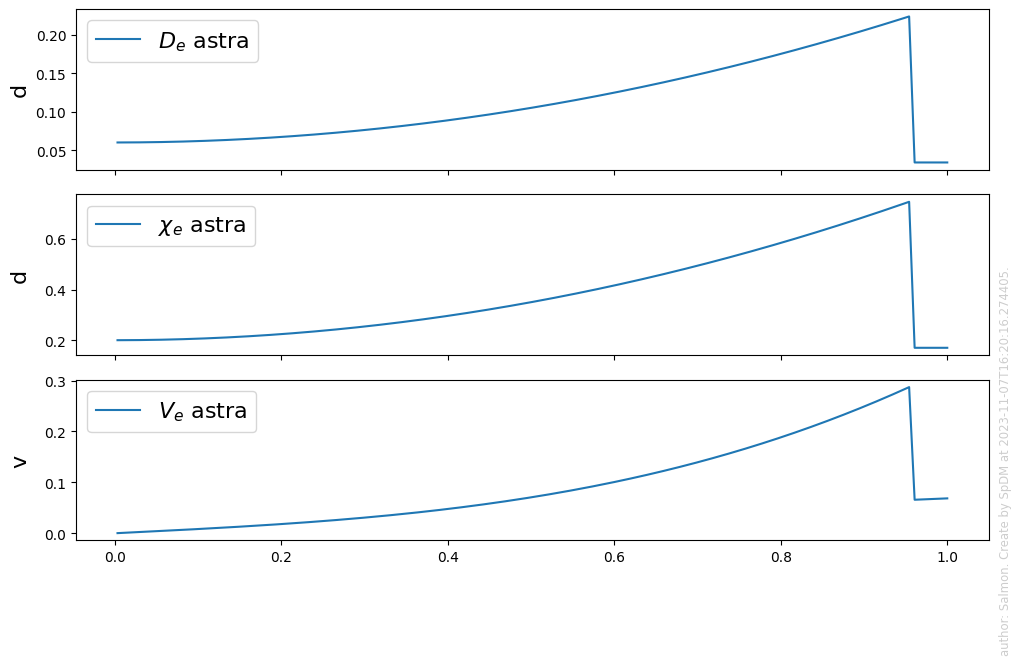

In [3]:
core_transport_1d = tokamak.core_transport.model[0].time_slice.current.profiles_1d
fig = sp_view.plot(
    [
        (core_transport_1d.electrons.particles.d, rf"$D_e$ astra"),
        (core_transport_1d.electrons.energy.d, rf"$\chi_e$ astra"),
        (core_transport_1d.electrons.energy.v, rf"$V_e$ astra"),
    ],
    x_axis=core_transport_1d.grid_d.rho_tor_norm,
)

In [10]:
tokamak.transport_solver.refresh(
    rho_tor_norm=np.linspace(0.01, 0.995, 32),
    equation={
        # "electrons/density_thermal": {
        #     "profile": 3.0e19,
        #     "boundary_condition": [{"identifier": {"index": 4}, "value": [0]}, {"identifier": {"index": 1}, "value": [4.0e19]}]},
        "electrons/temperature": {
            "profile": 2.0e3,
            "boundary_condition": [
                {"identifier": {"index": 4}, "value": [0]},
                {"identifier": {"index": 1}, "value": [1.0e3]},
            ],
        },
        "ion/T/density_thermal": {
            "profile": 1.5e19,
            "boundary_condition": [
                {"identifier": {"index": 4}, "value": [0]},
                {"identifier": {"index": 1}, "value": [2.0e19]},
            ],
        },
        "ion/D/density_thermal": {
            "profile": 1.5e19,
            "boundary_condition": [
                {"identifier": {"index": 4}, "value": [0]},
                {"identifier": {"index": 1}, "value": [2.0e19]},
            ],
        },
    },
    equilibrium=tokamak.equilibrium,
    core_transport=tokamak.core_transport,
    core_sources=tokamak.core_sources,
)

2023-11-07 16:21:00,440 [   fytok]     INFO: Solve transport equations [3] : electrons/temperature,ion/T/density_thermal,ion/D/density_thermal
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          6.19e+03       1.49e+20          32             52       
       2          1.91e+03       1.15e+20          84             156      
       3          5.37e+03       1.23e+27          240           (468)     
Number of nodes is exceeded after iteration 3. 
Maximum relative residual: 5.37e+03 
Maximum boundary residual: 1.23e+27
2023-11-07 16:21:03,440 [   fytok]    ERROR: /home/salmon/workspace/fytok/python/fytok/plugins/transport_solver_numerics/fytrans.py:678:solve: Solve BVP failed: The maximum number of mesh nodes is exceeded. , 3 iterations


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


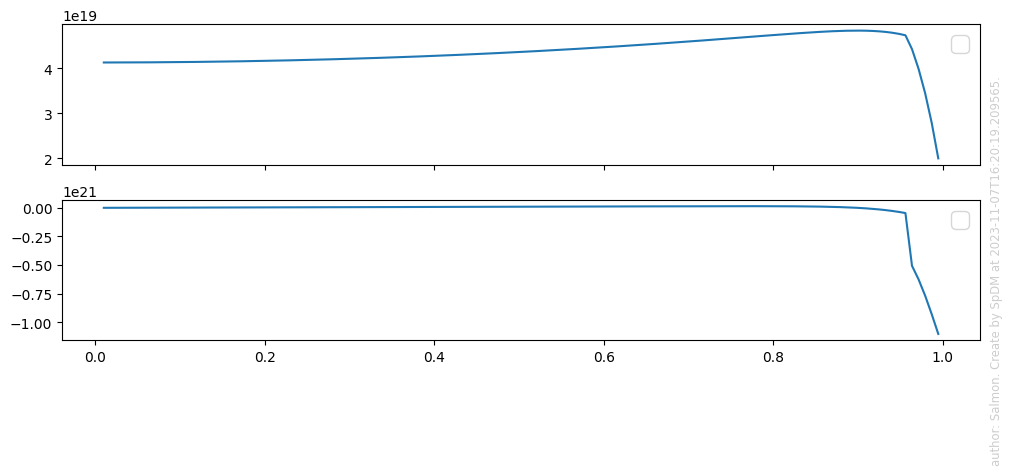

In [5]:
solver_1d = tokamak.transport_solver.time_slice.current.solver_1d
equ = solver_1d.equation[0]
a, b, c, d, e, f, g,*_ = equ.coefficient
x = solver_1d.grid.rho_tor_norm
y       = equ.primary_quantity.profile
yp      = equ.primary_quantity.d_dr
flux    = equ.primary_quantity.flux
dflux   = equ.primary_quantity.dflux_dr
fig = sp_view.plot([
    # * equ.coefficient,
    # [
    #     (d*yp, "$D$"),
    #     (e*y,   "$v$"),
    #     # (flux,   f"$\Gamma$"),
    #     ((c*(f - g * y)).I, r"$S$"),  # $\int c*(f - g \cdot y)$
    #     # ((-d*yp+e*y).I, r"$\Gamma$"),
    #     (-d*yp+e*y-(c*(f - g * y)).I, "residual"),

    # ],
    y, yp

    # [

    #     (dflux, {"label": r"$d\Gamma$"}),
    #     # (Function(flux, x).d(), r"$d\Gamma$"),
    #     ((c*(f - g * y)), r"$c*(f - g \cdot y)$"),
    # ],
],
    x_axis=x)

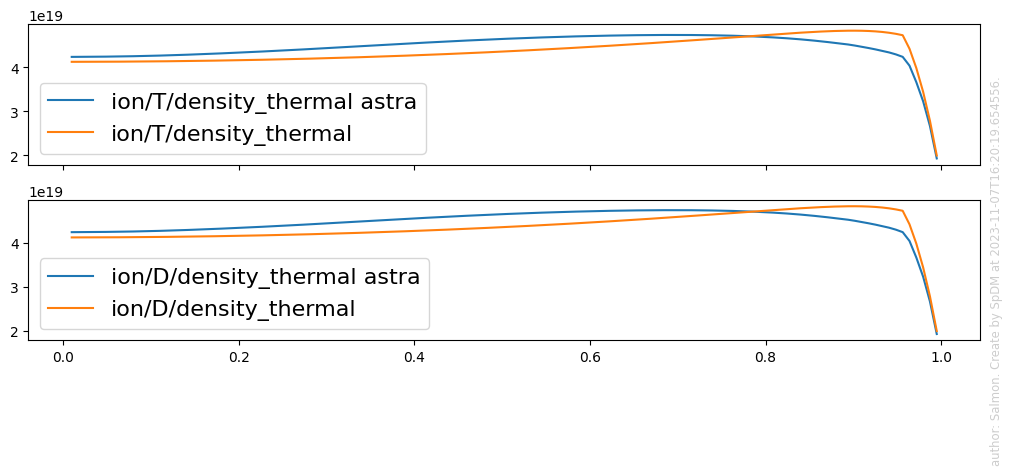

In [6]:
core_profiles_1d = tokamak.core_profiles.time_slice.current.profiles_1d
fig = sp_view.plot([
    [
        (core_profiles_1d.get(equ.primary_quantity.identifier), rf"{equ.primary_quantity.identifier} astra"),
        (equ.primary_quantity.profile, rf"{equ.primary_quantity.identifier}")
    ] for equ in solver_1d.equation
],
    x_axis=solver_1d.grid.rho_tor_norm
)